In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
class LazyLoadDataset(Dataset):
    def __init__(self, path, train=0, transform=None):
        self.transform = transform
        self.train = train

        if self.train == 0:
            self.pathX = path + "train/"
            # self.pathX = path + "high_pass_filter_train/"
            # self.pathX = path + "to_hsv_train/"
        elif self.train == 1:
            self.pathX = path + "test/"
            # self.pathX = path + "high_pass_filter_test/"
            # self.pathX = path + "to_hsv_test/"
        else:
            self.pathX = path + "val/"

        self.pathY = "/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/image_data.csv"

        self.img_data = pd.read_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/image_data.csv')
        self.train_idx = self.img_data.index[self.img_data['folder'] == 'train'].tolist()
        self.test_idx = self.img_data.index[self.img_data['folder'] == 'test'].tolist()
        self.val_idx = self.img_data.index[self.img_data['folder'] == 'val'].tolist()
        
    def __getitem__(self, idx):
        # f = self.data[idx]

        #X
        if self.train == 0:
            i = self.train_idx[idx]
        elif self.train == 1:
            i = self.test_idx[idx]
        else:
            i = self.val_idx[idx]

        img = cv2.imread(self.pathX + str(i) + ".jpg")

        if self.transform is not None:
            img = self.transform(img)

        #Y
        Y = self.img_data['label'][i]

        return (img,i), Y

    def __len__(self):
        if self.train == 0:
            l = len(self.train_idx)
        elif self.train == 1:
            l = len(self.test_idx)
        else:
            l = len(self.val_idx)
        return l

In [88]:
# train_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/", train=0, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
# train_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/high_pass_filter/", train=0, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
train_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/to_hsv/", train=0, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                        transforms.Normalize((0.1307,), (0.3081,))
                                                                                                       ]))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# test_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/", train=1, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
test_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/to_hsv/", train=1, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                        transforms.Normalize((0.1307,), (0.3081,))
                                                                                                       ]))
# test_dataset = LazyLoadDataset("/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/high_pass_filter/", train=1, transform = transforms.Compose([transforms.ToTensor(),
#                                                                                                         transforms.Normalize((0.1307,), (0.3081,))
#                                                                                                        ]))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

fake tensor(1653)
real tensor(76)


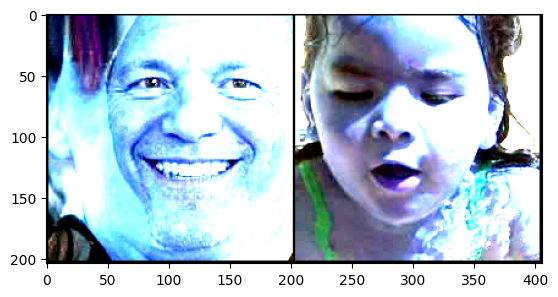

In [5]:
#visualize one image from each class
import torchvision

img = []
visited_labels = set()
train_loader_iter = iter(train_loader)

while len(visited_labels) < 2:
    (features, idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            visited_labels.add(label)
            img.append(features[i])
            print(label, idx[i])
            
img = torchvision.utils.make_grid(img)
plt.imshow(img.permute(1, 2, 0))

tensor(1)
tensor(1880)


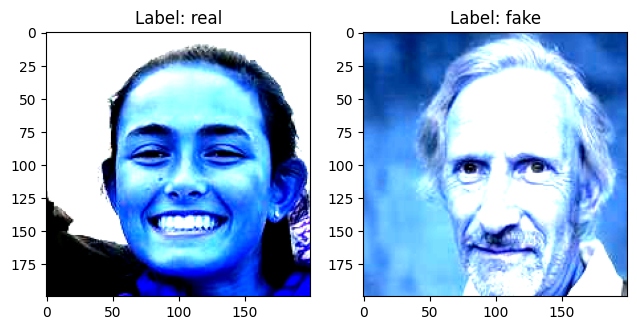

In [6]:
#or alternatively
import torchvision

fig, axes = plt.subplots(1, 2, figsize=(1.5*5,2*2))

visited_labels = set()
train_loader_iter = iter(train_loader)

while len(visited_labels) < 2:
    (features,idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            ax = axes[len(visited_labels)]
            visited_labels.add(label)
            ax.imshow(features[i].permute(1, 2, 0), cmap='gray')
            ax.set_title('Label: {}'.format(label))
            print(idx[i])
plt.show()           

real tensor(0)


fake tensor(1501)


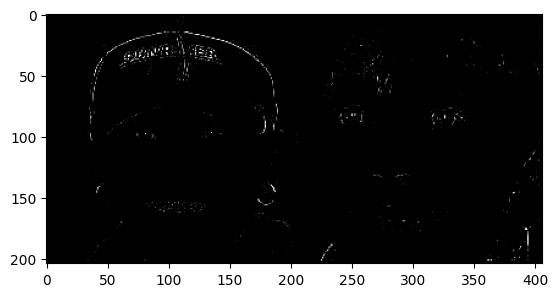

In [83]:
#high_pass_filter

#visualize one image from each class
import torchvision

img = []
visited_labels = set()
train_loader_iter = iter(test_loader)

while len(visited_labels) < 2:
    (features, idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            visited_labels.add(label)
            img.append(features[i])
            print(label, idx[i])
            
img = torchvision.utils.make_grid(img)
plt.imshow(img.permute(1, 2, 0))

real tensor(0)


fake tensor(1501)


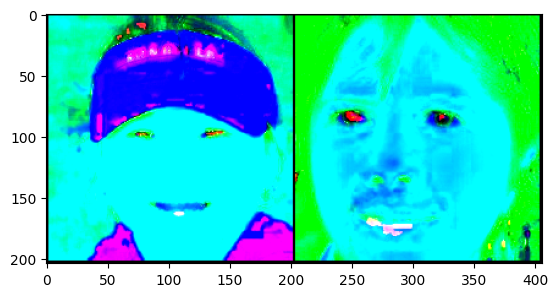

In [89]:
#to_hsv

#visualize one image from each class
import torchvision

img = []
visited_labels = set()
train_loader_iter = iter(test_loader)

while len(visited_labels) < 2:
    (features, idx), labels = next(train_loader_iter)
    for i, label in enumerate(labels):
        if label not in visited_labels:
            visited_labels.add(label)
            img.append(features[i])
            print(label, idx[i])
            
img = torchvision.utils.make_grid(img)
plt.imshow(img.permute(1, 2, 0))

In [45]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [90]:
import torch.optim as optim
import torchvision.models as models

# Define the ResNet18 model
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # change last layer

model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [91]:
epochs = 50

train_losses = []
train_accs = []

test_losses = []
test_accs  = []

test_predictions = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0
    
    for batch_idx, ((X_train, idx), y_train) in enumerate(train_loader):

        y_train = list(y_train)

        for j in range(len(y_train)):
            if y_train[j] == 'real':
                y_train[j] = 0
            else:
                y_train[j] = 1

        y_train = torch.tensor(np.asarray(y_train))

        X_train, y_train = X_train.to(device), y_train.to(device)

        # y_pred = model(X_train.view(100, -1))
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)


        
        predicted = torch.max(y_pred.data, 1)[1]

        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
           
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            
            # if batch_idx == 0:
            #     batch_accuracy = 0
            # else:
            #     #batch accuracy
            #     batch_accuracy = trn_corr.item()*100 / (batch_idx * len(X_train))
            
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                i, batch_idx * len(X_train), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)

    with torch.no_grad():
      
        for (X_test,idx), y_test in test_loader:
          
            y_test = list(y_test)

            for j in range(len(y_test)):
                if y_test[j] == 'real':
                    y_test[j] = 0
                else:
                    y_test[j] = 1

            y_test = torch.tensor(np.asarray(y_test))

            X_test, y_test = X_test.to(device), y_test.to(device)
            
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

            if i == epochs - 1:
                test_predictions.extend(predicted.cpu().numpy())

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')
    # print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy}')

Train Epoch: 0 [0/2400 (0%)]	Loss: 0.699434
Train Epoch: 0 [640/2400 (26%)]	Loss: 0.742699
Train Epoch: 0 [1280/2400 (53%)]	Loss: 0.740923
Train Epoch: 0 [1920/2400 (79%)]	Loss: 0.610933
epoch: 0 training loss:0.6587092876434326 training accuracy:59.375 val loss:0.8193415403366089 val accuracy:50.0
Train Epoch: 1 [0/2400 (0%)]	Loss: 0.566469
Train Epoch: 1 [640/2400 (26%)]	Loss: 0.563195
Train Epoch: 1 [1280/2400 (53%)]	Loss: 0.603367
Train Epoch: 1 [1920/2400 (79%)]	Loss: 0.596459
epoch: 1 training loss:0.5979729294776917 training accuracy:63.625 val loss:0.640941321849823 val accuracy:53.333333333333336
Train Epoch: 2 [0/2400 (0%)]	Loss: 0.575775
Train Epoch: 2 [640/2400 (26%)]	Loss: 0.566364
Train Epoch: 2 [1280/2400 (53%)]	Loss: 0.641507
Train Epoch: 2 [1920/2400 (79%)]	Loss: 0.604602
epoch: 2 training loss:0.5717145204544067 training accuracy:68.83333333333333 val loss:0.66180020570755 val accuracy:50.69444444444444
Train Epoch: 3 [0/2400 (0%)]	Loss: 0.616394
Train Epoch: 3 [640/2

In [53]:
# test_losses = []
# test_accs  = []
# tst_corr = 0

# with torch.no_grad():
      
#     for (X_test,idx), y_test in test_loader:
      
#         y_test = list(y_test)

#         for j in range(len(y_test)):
#             if y_test[j] == 'real':
#                 y_test[j] = 0
#             else:
#                 y_test[j] = 1

#         y_test = torch.tensor(np.asarray(y_test))

#         X_test, y_test = X_test.to(device), y_test.to(device)
        
#         y_val = model(X_test)
        
#         predicted = torch.max(y_val.data, 1)[1]
#         tst_corr += (predicted == y_test).sum()

#         test_predictions.extend(predicted.cpu().numpy())

# test_accuracy = tst_corr.item()*100 / (len(test_dataset))

# val_loss = criterion(y_val,y_test)
# test_losses.append(val_loss)
# test_accs.append(test_accuracy)
# print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 49 training loss:0.20465876162052155 training accuracy:99.875 val loss:5.26071834564209 val accuracy:52.5


In [77]:
#save to new csv

test_predictions_df = pd.DataFrame(test_predictions, columns=['original_data'])

test_predictions_df.to_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/resnet.csv', index=False)

In [92]:
# to existing csv

existing_df = pd.read_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/resnet.csv')

assert len(test_predictions) == len(existing_df), "The number of predictions and the number of rows in the existing DataFrame must match."

# existing_df['high-pass_filter'] = test_predictions
existing_df['to_hsv'] = test_predictions

existing_df.to_csv('/content/drive/MyDrive/2023_Spring/Advanced_Topics_in_DS/Project/small_processed_data/resnet.csv', index=False)